# IMPORTING REQUIRED LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sbn

# LOADING DATASET

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
url = "/content/drive/MyDrive/IR-data/email-Eu-core.txt.gz"
data = pd.read_csv(url, compression='gzip', sep=',', quotechar='"')
data=np.append(data,['0 1'])


Mounted at /content/drive


# CREATING SET OF NODES AND EDGE LIST

In [ ]:
dd=[str(d).split() for d in data]
node1=[int(d[0]) for d in dd]
node2=[int(d[1]) for d in dd]
node1.extend(node2)
nodes = list(set(node1))
edges=[]
am=np.zeros((len(nodes),len(nodes)))
for d in dd:
  edges.append((int(d[0]),int(d[1])))
  am[int(d[0])][int(d[1])]+=1


# CREATING GRAPH

In [ ]:
g = nx.DiGraph()
g.add_nodes_from(nodes)
g.add_edges_from(edges)

# FINDING PAGERANK SCORES

In [ ]:
pagerank_score = nx.pagerank(g)

In [ ]:
print(f"Page Rank Scores: \n{pagerank_score}")

Page Rank Scores: 
{0: 0.0012754775504594832, 1: 0.009411560186382712, 2: 0.002095369381767161, 3: 0.0017234388700051611, 4: 0.002436232111121507, 5: 0.004525470848399022, 6: 0.0029192068825005272, 7: 0.0019464642315471185, 8: 0.0012364305542142788, 9: 0.001212215032480912, 10: 0.0013292723987216259, 11: 0.002289046520387193, 12: 0.0016365498076585522, 13: 0.002174677080911033, 14: 0.0017008199595549105, 15: 0.001589802529811306, 16: 0.0020210102759722526, 17: 0.001907055205270155, 18: 0.0013262819820475404, 19: 0.0021196946823522694, 20: 0.0022199973212970563, 21: 0.003767829276367166, 22: 0.0005601507079445894, 23: 0.002110969398523054, 24: 0.0010190577722610724, 25: 0.0012056517925602638, 26: 0.0010660051848652102, 27: 0.0017106176174544606, 28: 0.0029687137894348604, 29: 0.0015567182149975102, 30: 0.0017811043751992657, 31: 0.0011800767587410066, 32: 0.0010864630541162767, 33: 0.0008224977626537843, 34: 0.0009236081226461043, 35: 0.0017555776350985162, 36: 0.001409274651214047, 37:

# HUBS AND AUTHORITIES SCORE

In [ ]:
hubs_score, authorities_score = nx.hits(g)

In [ ]:
print(f"Hubs Score: \n{hubs_score}")

Hubs Score: 
{0: 0.0011656523581661017, 1: 2.9004622902639858e-05, 2: 0.0031253395063052586, 3: 0.002490764619390502, 4: 0.0038790281781767005, 5: 0.0050482548632917405, 6: 0.003451142063154336, 7: 0.0014670269392468944, 8: 0.0007134118810922484, 9: 0.0003877862894847767, 10: 0.0016319219935539183, 11: 0.0020545042180840894, 12: 0.001465790857041766, 13: 0.005345007274275857, 14: 0.002275327134056639, 15: 0.0014345706495043512, 16: 0.002732362557271793, 17: 0.004576554119562813, 18: 0.0018919144873631513, 19: 0.002113865740088282, 20: 0.002436209700633867, 21: 0.006185173876613759, 22: 0.0005109299093396319, 23: 0.0029102763511490446, 24: 0.0011497532500082902, 25: 0.0005707677156408709, 26: 0.0006030527736465959, 27: 0.0013714989725029311, 28: 0.004085719646644437, 29: 0.0017021932982357983, 30: 0.002584535057268424, 31: 0.0019855851323412406, 32: 0.0007686275073845198, 33: 0.0006359360510358753, 34: 0.0008330964737819834, 35: 0.001988049362371076, 36: 0.0010817988101948486, 37: 0.000

In [ ]:
print(f"Authorities Score: \n{authorities_score}")

Authorities Score: 
{0: 0.0008525503876603126, 1: 0.0017024061489624488, 2: 0.0027787612230178436, 3: 0.00272385094912437, 4: 0.0031860034615935505, 5: 0.003917430684266547, 6: 0.002512986894272629, 7: 0.0010488209777385668, 8: 0.0009345511864358783, 9: 0.0002884959959336271, 10: 0.0018150659893945193, 11: 0.0015419432490676006, 12: 0.0016786629817342417, 13: 0.002425476508237029, 14: 0.0016370612677592817, 15: 0.0015378836679498101, 16: 0.0030515743325580684, 17: 0.002635241191111867, 18: 0.0019931069481607575, 19: 0.002322438505944744, 20: 0.002606831536911255, 21: 0.004734988935644903, 22: 0.00041444384256843, 23: 0.0032259716405452156, 24: 0.0008903060111596779, 25: 0.0011031822071916, 26: 0.0007400394650381411, 27: 0.0016764566729752255, 28: 0.004780581963208337, 29: 0.001864695204834899, 30: 0.002568038228703345, 31: 0.0017821519578759806, 32: 0.0009754661971606171, 33: 0.0007735878540771517, 34: 0.0005979039401853303, 35: 0.002313605014058188, 36: 0.002072100477026661, 37: 0.000

# CALCULATING TOP PAGERANK, HUBS, AUTHORITIES BY SCORES

In [ ]:
def Sort_Tuple(tup):
    tup.sort(key = lambda x: x[1])
    return list(reversed(tup))

In [ ]:
tpn = Sort_Tuple(pagerank_score.items())
thn= Sort_Tuple(hubs_score.items())
tan = Sort_Tuple(authorities_score.items())

In [ ]:
print(f"Top 20 NodeIDs based on PageRank Score: \n{tpn[:20]}")

Top 20 NodeIDs based on PageRank Score: 
[(1, 0.009411560186382712), (130, 0.006913890234439256), (160, 0.006758893760759583), (62, 0.005322217132261051), (86, 0.005130048318172175), (107, 0.005004366663608102), (365, 0.0047866896114220235), (121, 0.004720808207765978), (5, 0.004525470848399022), (129, 0.004452932454005516), (183, 0.004274077086284579), (64, 0.004212852305495342), (434, 0.004204618432068703), (532, 0.004066458497194306), (128, 0.004059391927474062), (106, 0.003972604887815871), (21, 0.003767829276367166), (166, 0.003694307929055595), (301, 0.0035534403358843036), (82, 0.003486223428564329)]


In [ ]:
print(f"Top 20 NodeIDs based on Hub Score: \n{thn[:20]}")

Top 20 NodeIDs based on Hub Score: 
[(160, 0.01062880261103844), (82, 0.009616665861905405), (121, 0.009530349046577477), (107, 0.00878806711376408), (62, 0.008232597715453005), (249, 0.00801750320392134), (434, 0.007541252050552116), (183, 0.007200020331138289), (86, 0.00700307416176555), (114, 0.006398316126418317), (105, 0.006319911627527698), (211, 0.006316843868434013), (129, 0.006263261327836559), (21, 0.006185173876613759), (87, 0.00610532860889236), (142, 0.005975687745137405), (283, 0.005945391302637274), (333, 0.005935320371941511), (212, 0.005904679736203029), (83, 0.005795863799803599)]


In [ ]:
print(f"Top 20 NodeIDs based on Authority Score: \n{tan[:20]}")

Top 20 NodeIDs based on Authority Score: 
[(160, 0.007220481699191957), (107, 0.006898170199864649), (62, 0.006695883147202668), (434, 0.006485092543979908), (121, 0.006471582443168835), (183, 0.006040848953683615), (128, 0.005947949784933279), (249, 0.005729100052968213), (256, 0.00570387306905046), (129, 0.005677728282821717), (283, 0.005624302452518073), (82, 0.00547776809636636), (106, 0.0054594690255253455), (114, 0.005443428064703841), (87, 0.005424605644066673), (166, 0.005395009932620827), (211, 0.005305227546187138), (105, 0.005187637709428278), (212, 0.005181510768674982), (115, 0.00512933786313598)]


# PAGERANK DISTRIBUTION AND RUG PLOT

In [ ]:
def freq(l):
  f={}
  for i in l:
    if i not in f:
      f[i]=1
    else:
      f[i]+=1
  return f

In [ ]:
t=list(pagerank_score.values())
p = freq(t)

Text(0.5, 0, 'PageRank Scores')

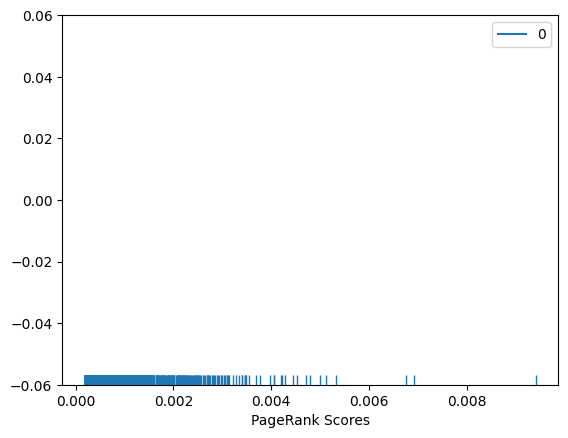

In [ ]:
%matplotlib inline

sbn.rugplot(pagerank_score.values())
plt.xlabel('PageRank Scores')

# HUBS DISTRIBUTION AND RUG PLOT

In [ ]:
t=list(hubs_score.values())
h = freq(t)

Text(0.5, 0, 'Hubs Scores')

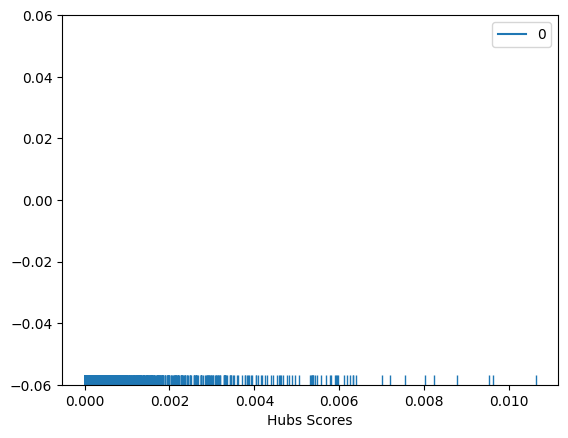

In [ ]:
%matplotlib inline

sbn.rugplot(hubs_score.values())
plt.xlabel('Hubs Scores')

# AUTHORITIES DISTRIBUTION AND RUG PLOT

In [ ]:
t=list(authorities_score.values())
a = freq(t)

Text(0.5, 0, 'Authorities Scores')

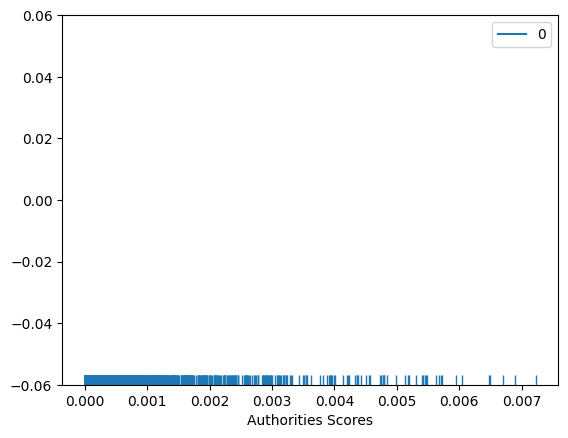

In [ ]:
%matplotlib inline

sbn.rugplot(authorities_score.values())
plt.xlabel('Authorities Scores')